# **AgroData**

Escola: SoulCode Academy

Curso: Analista de Dados e Dashboards

Período: Noturno

Assunto: Projeto Final

Professor: Franciane Rodrigues

Aluna: Jéssica, Leandro, Thais, Thamires, Victor e Vinicius

## **Extração**

#### **Instalação de pacotes e dependências**

In [1]:
# Instalando pacotes necessários para execução da visualização
!pip install geopandas --quiet
!pip install plotly --quiet

#### **Importações das bibliotecas**

In [2]:
# Importando bibliotecas
from google.cloud import bigquery
import pandas as pd
import pandas_gbq
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns

#### **Abertura das bases de dados**

In [3]:
# Passo 1: Autenticando o usuário no Google Colab
from google.colab import auth
auth.authenticate_user()

In [4]:
# Passo 2: Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Passo 3: Importando as bibliotecas do Google BigQuery em um ambiente Python
from google.cloud import bigquery
import pandas as pd
import pandas_gbq
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# Passo 4: Informando o nome do projeto
project_id = 'integral-surfer-422200-k6'
client = bigquery.Client(project=project_id)

In [7]:
# Passo 5: realizando a conexação da consulta com a bigquery

# Produção Aquicultura
query_extracao_PA = client.query('''SELECT * FROM `integral-surfer-422200-k6.basedados.producaoAquicultura`''')


# Produção de origem Animal
query_extracao_POA = client.query('''SELECT *  FROM `integral-surfer-422200-k6.basedados.producaoOrigemAnimal`''')


# Base de dados dos municipios do Brasil
df_mapa = gpd.read_file('/content/drive/MyDrive/Meu PC/dados_youtube/BR_Municipios_2022/BR_Municipios_2022.shp')        # Leandro
#df_mapa = gpd.read_file('/content/drive/MyDrive/Curso Dash /Dados/Semana 9/BR_Municipios_2022/BR_Municipios_2022.shp')  # Victor
#df_mapa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Soul Code/Semana 9/Municipios/BR_Municipios_2022.shp')   # Thamires
#df_mapa = gpd.read_file('/content/ProjetoSoulCode/BR_Municipios_2022/BR_Municipios_2022.shp')                           # Thais

In [8]:
# Lendo o Conjunto de dados
df_ProducaoAquicultura = query_extracao_PA.to_dataframe()
df_ProducaoOrigemAnimal = query_extracao_POA.to_dataframe()

In [9]:
df_mapa.head()

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry  
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Tratamento**

#### **Reduzindo DataFrame**

In [11]:
# Reduzindo o dataframe (anos 2020-2022)
df_ProducaoAquicultura = df_ProducaoAquicultura[(df_ProducaoAquicultura['ano'] >= 2020) & (df_ProducaoAquicultura['ano'] <= 2022)]

df_ProducaoOrigemAnimal =  df_ProducaoOrigemAnimal[(df_ProducaoOrigemAnimal['ano'] >= 2020) & (df_ProducaoOrigemAnimal['ano'] <= 2022)]

print(pd.unique(df_ProducaoAquicultura['ano']))
print(pd.unique(df_ProducaoOrigemAnimal['ano']))

<IntegerArray>
[2021, 2022, 2020]
Length: 3, dtype: Int64
<IntegerArray>
[2022, 2020, 2021]
Length: 3, dtype: Int64


In [12]:
# Removendo linhas com valor zero nas colunas 'quantidade' e 'valor'
df_ProducaoAquicultura = df_ProducaoAquicultura[(df_ProducaoAquicultura['quantidade'] > 0) & (df_ProducaoAquicultura['valor'] > 0)]

df_ProducaoOrigemAnimal =  df_ProducaoOrigemAnimal[(df_ProducaoOrigemAnimal['quantidade'] > 0) & (df_ProducaoOrigemAnimal['valor'] > 0)]

In [13]:
# Visualizando dataframe Aquicultura
df_ProducaoAquicultura.head(5)

ano sigla_uf id_municipio produto  quantidade  valor
0  2021       MA      2103901   Carpa        8900     67
1  2021       PI      2208106   Carpa         200      2
2  2021       PI      2208304   Carpa        2500     25
3  2021       PI      2209203   Carpa        1000     15
4  2021       PI      2209708   Carpa          60      1

In [14]:
# Visualizando dataframe Origem Animal
df_ProducaoOrigemAnimal.head(5)

ano sigla_uf id_municipio produto     unidade  quantidade  valor
314655  2022       AC      1200054   Leite  Mil litros         215    366
314656  2022       AC      1200500   Leite  Mil litros        1823   2734
314657  2022       AC      1200104   Leite  Mil litros        2268   3085
314658  2022       AC      1200336   Leite  Mil litros         273    532
314659  2022       AC      1200401   Leite  Mil litros        2557   4603

In [15]:
# Verificando se há valores zeros
#df_ProducaoOrigemAnimal[df_ProducaoOrigemAnimal['quantidade'] > 0]
df_ProducaoOrigemAnimal[df_ProducaoOrigemAnimal.isin({0}).any(axis=1)]

Empty DataFrame
Columns: [ano, sigla_uf, id_municipio, produto, unidade, quantidade, valor]
Index: []

In [16]:
# Informações do dataframe
df_ProducaoOrigemAnimal.info()
print("\n---------------------------------\n")
df_ProducaoAquicultura.info()
print("\n---------------------------------\n")
df_mapa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 314655 to 640556
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           49986 non-null  Int64 
 1   sigla_uf      49986 non-null  object
 2   id_municipio  49986 non-null  object
 3   produto       49986 non-null  object
 4   unidade       49986 non-null  object
 5   quantidade    49986 non-null  Int64 
 6   valor         49986 non-null  Int64 
dtypes: Int64(3), object(4)
memory usage: 3.2+ MB

---------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 28095 entries, 0 to 46751
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           28095 non-null  Int64 
 1   sigla_uf      28095 non-null  object
 2   id_municipio  28095 non-null  object
 3   produto       28095 non-null  object
 4   quantidade    28095 non-null  Int64 
 5   valor         28095 non-n

#### **Analisando valores nulos**

In [17]:
# checagem dos dados nulos Origem Animal
df_ProducaoOrigemAnimal.isnull().sum()

ano             0
sigla_uf        0
id_municipio    0
produto         0
unidade         0
quantidade      0
valor           0
dtype: int64

In [18]:
# checagem dos dados nulos Aquicultura
df_ProducaoAquicultura.isnull().sum()

ano             0
sigla_uf        0
id_municipio    0
produto         0
quantidade      0
valor           0
dtype: int64

In [19]:
# checagem dos dados nulos Mapa
df_mapa.isnull().sum()

CD_MUN      0
NM_MUN      0
SIGLA_UF    0
AREA_KM2    0
geometry    0
dtype: int64

#### **Inserindo nova coluna**

In [20]:
# Inserindo uma nova coluna 'valor de produção por unidade'
df_ProducaoAquicultura['vp_unidade_AC'] = round(df_ProducaoAquicultura['valor']*1000/df_ProducaoAquicultura['quantidade'], 2)

df_ProducaoOrigemAnimal['vp_unidade_OA'] = round(df_ProducaoOrigemAnimal['valor']*1000/df_ProducaoOrigemAnimal['quantidade'], 2)

In [21]:
# Checando inserção da nova coluna Origem Animal
df_ProducaoAquicultura.sample(5)

ano sigla_uf id_municipio   produto  quantidade  valor  vp_unidade_AC
20811  2022       PA      1505502  Tambaqui     2764180  33170           12.0
39996  2020       PI      2206753  Tambaqui       13648    123           9.01
3719   2021       AL      2707800   Tilápia       10000    190           19.0
23324  2022       PR      4110508   Tilápia        8550     81           9.47
41045  2020       AL      2705705   Tilápia       18000    180           10.0

In [22]:
# Checando inserção da nova coluna Aquicultura
df_ProducaoOrigemAnimal.sample(5)

ano sigla_uf id_municipio          produto      unidade  quantidade  \
640549  2021       TO      1707553  Ovos de galinha   Mil dúzias        2677   
316131  2022       BA      2906857  Ovos de galinha   Mil dúzias          81   
423855  2020       PE      2603306  Ovos de galinha   Mil dúzias         273   
422762  2020       PA      1506559  Ovos de galinha   Mil dúzias          25   
330352  2022       SP      3514809    Mel de abelha  Quilogramas         870   

        valor  vp_unidade_OA  
640549  12851        4800.52  
316131    485        5987.65  
423855   1637        5996.34  
422762    186         7440.0  
330352     22          25.29

#### **Analisando tipos de dados**

In [23]:
# Analisando os tipos de dados Aquicultura
df_ProducaoAquicultura.dtypes

ano                Int64
sigla_uf          object
id_municipio      object
produto           object
quantidade         Int64
valor              Int64
vp_unidade_AC    Float64
dtype: object

In [24]:
# Analisando os tipos de dados Origem Animal
df_ProducaoOrigemAnimal.dtypes

ano                Int64
sigla_uf          object
id_municipio      object
produto           object
unidade           object
quantidade         Int64
valor              Int64
vp_unidade_OA    Float64
dtype: object

In [25]:
# Analisando os tipos de dados Mapa
df_mapa.dtypes

CD_MUN        object
NM_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dtype: object

In [26]:
# Alterando o tipo da coluna 'Ano'
df_ProducaoAquicultura['ano'] = df_ProducaoAquicultura['ano'].astype(str)

df_ProducaoOrigemAnimal['ano'] = df_ProducaoOrigemAnimal['ano'].astype(str)

In [27]:
# Conferindo os tipos de dados Aquicultura
df_ProducaoAquicultura.dtypes

ano               object
sigla_uf          object
id_municipio      object
produto           object
quantidade         Int64
valor              Int64
vp_unidade_AC    Float64
dtype: object

In [28]:
# Conferindo os tipos de dados Origem Animal
df_ProducaoOrigemAnimal.dtypes

ano               object
sigla_uf          object
id_municipio      object
produto           object
unidade           object
quantidade         Int64
valor              Int64
vp_unidade_OA    Float64
dtype: object

#### **Removendo colunas**

In [29]:
# Informações do dataframe Origem Animal
df_ProducaoOrigemAnimal.head(5)

ano sigla_uf id_municipio produto     unidade  quantidade  valor  \
314655  2022       AC      1200054   Leite  Mil litros         215    366   
314656  2022       AC      1200500   Leite  Mil litros        1823   2734   
314657  2022       AC      1200104   Leite  Mil litros        2268   3085   
314658  2022       AC      1200336   Leite  Mil litros         273    532   
314659  2022       AC      1200401   Leite  Mil litros        2557   4603   

        vp_unidade_OA  
314655        1702.33  
314656        1499.73  
314657        1360.23  
314658        1948.72  
314659        1800.16

In [30]:
# Informações do dataframe Aquicultura
df_ProducaoAquicultura.head(5)

ano sigla_uf id_municipio produto  quantidade  valor  vp_unidade_AC
0  2021       MA      2103901   Carpa        8900     67           7.53
1  2021       PI      2208106   Carpa         200      2           10.0
2  2021       PI      2208304   Carpa        2500     25           10.0
3  2021       PI      2209203   Carpa        1000     15           15.0
4  2021       PI      2209708   Carpa          60      1          16.67

In [31]:
# Informações do dataframe Mapa
df_mapa.head(5)

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry  
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...

In [32]:
# Remoção das colunas 'sigla_uf' e 'AREA_KM2'
df_ProducaoAquicultura.drop(['sigla_uf'], axis=1, inplace=True)

df_ProducaoOrigemAnimal.drop(['sigla_uf'], axis=1, inplace=True)

df_mapa.drop(['AREA_KM2'], axis=1, inplace=True)

In [33]:
# Chechando remoção Aquicultura
df_ProducaoAquicultura.head(5)

ano id_municipio produto  quantidade  valor  vp_unidade_AC
0  2021      2103901   Carpa        8900     67           7.53
1  2021      2208106   Carpa         200      2           10.0
2  2021      2208304   Carpa        2500     25           10.0
3  2021      2209203   Carpa        1000     15           15.0
4  2021      2209708   Carpa          60      1          16.67

In [34]:
# Chechando remoção Origem Animal
df_ProducaoOrigemAnimal.head(5)

ano id_municipio produto     unidade  quantidade  valor  \
314655  2022      1200054   Leite  Mil litros         215    366   
314656  2022      1200500   Leite  Mil litros        1823   2734   
314657  2022      1200104   Leite  Mil litros        2268   3085   
314658  2022      1200336   Leite  Mil litros         273    532   
314659  2022      1200401   Leite  Mil litros        2557   4603   

        vp_unidade_OA  
314655        1702.33  
314656        1499.73  
314657        1360.23  
314658        1948.72  
314659        1800.16

In [35]:
# Chechando remoção Mapa
df_mapa.head(5)

CD_MUN                 NM_MUN SIGLA_UF  \
0  1100015  Alta Floresta D'Oeste       RO   
1  1100023              Ariquemes       RO   
2  1100031                 Cabixi       RO   
3  1100049                 Cacoal       RO   
4  1100056             Cerejeiras       RO   

                                            geometry  
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...

#### **Renomeando as colunas**

In [36]:
# Renomeação
df_ProducaoAquicultura = df_ProducaoAquicultura.rename({'id_municipio': 'CODIGO'}, axis = 1)
df_ProducaoAquicultura = df_ProducaoAquicultura.rename({'produto': 'produto_AC'}, axis = 1)
df_ProducaoAquicultura = df_ProducaoAquicultura.rename({'quantidade': 'quantidade_AC'}, axis = 1)
df_ProducaoAquicultura = df_ProducaoAquicultura.rename({'valor': 'valor_AC'}, axis = 1)

In [37]:
# Renomeação
df_ProducaoOrigemAnimal = df_ProducaoOrigemAnimal.rename({'id_municipio': 'CODIGO'}, axis = 1)
df_ProducaoOrigemAnimal = df_ProducaoOrigemAnimal.rename({'produto': 'produto_OA'}, axis = 1)
df_ProducaoOrigemAnimal = df_ProducaoOrigemAnimal.rename({'unidade': 'unidade_OA'}, axis = 1)
df_ProducaoOrigemAnimal = df_ProducaoOrigemAnimal.rename({'quantidade': 'quantidade_OA'}, axis = 1)
df_ProducaoOrigemAnimal = df_ProducaoOrigemAnimal.rename({'valor': 'valor_OA'}, axis = 1)

In [38]:
# Renomeação
df_mapa = df_mapa.rename({'CD_MUN': 'CODIGO'}, axis = 1)
df_mapa = df_mapa.rename({'NM_MUN': 'NOME_MUNICIPIO'}, axis = 1)

In [39]:
# Chechando renomeação Aquicultura
df_ProducaoAquicultura.head(5)

ano   CODIGO produto_AC  quantidade_AC  valor_AC  vp_unidade_AC
0  2021  2103901      Carpa           8900        67           7.53
1  2021  2208106      Carpa            200         2           10.0
2  2021  2208304      Carpa           2500        25           10.0
3  2021  2209203      Carpa           1000        15           15.0
4  2021  2209708      Carpa             60         1          16.67

In [40]:
# Chechando renomeação Origem Animal
df_ProducaoOrigemAnimal.head(5)

ano   CODIGO produto_OA  unidade_OA  quantidade_OA  valor_OA  \
314655  2022  1200054      Leite  Mil litros            215       366   
314656  2022  1200500      Leite  Mil litros           1823      2734   
314657  2022  1200104      Leite  Mil litros           2268      3085   
314658  2022  1200336      Leite  Mil litros            273       532   
314659  2022  1200401      Leite  Mil litros           2557      4603   

        vp_unidade_OA  
314655        1702.33  
314656        1499.73  
314657        1360.23  
314658        1948.72  
314659        1800.16

In [41]:
# Chechando renomeação Mapa
df_mapa.head(5)

CODIGO         NOME_MUNICIPIO SIGLA_UF  \
0  1100015  Alta Floresta D'Oeste       RO   
1  1100023              Ariquemes       RO   
2  1100031                 Cabixi       RO   
3  1100049                 Cacoal       RO   
4  1100056             Cerejeiras       RO   

                                            geometry  
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...

#### **Unindo DataFrames**

In [42]:
# Verificando o tamanho do dataframe Aquicultura
df_ProducaoAquicultura.shape

(28095, 6)

In [43]:
# Verificando o tamanho do dataframe Origem Animal
df_ProducaoOrigemAnimal.shape

(49986, 7)

In [44]:
# Verificando o tamanho do dataframe Mapa
df_mapa.shape

(5572, 4)

In [45]:
# União dos dataframe Origem Animal e Aquicultura
uniao_OA_AC = df_ProducaoOrigemAnimal.merge(df_ProducaoAquicultura, on = ['CODIGO', 'ano'], how = "outer")

In [46]:
# Chechando união dos dataframe
uniao_OA_AC.head(5)

ano   CODIGO       produto_OA  unidade_OA  quantidade_OA  valor_OA  \
0  2022  1200054            Leite  Mil litros            215       366   
1  2022  1200054            Leite  Mil litros            215       366   
2  2022  1200054            Leite  Mil litros            215       366   
3  2022  1200054            Leite  Mil litros            215       366   
4  2022  1200054  Ovos de galinha  Mil dúzias             54       389   

   vp_unidade_OA           produto_AC  quantidade_AC  valor_AC  vp_unidade_AC  
0        1702.33             Tambaqui           2376        32          13.47  
1        1702.33          Pirapitinga          11880       172          14.48  
2        1702.33  Tambacu, tambatinga            990        13          13.13  
3        1702.33  Curimatã, curimbatá           3564        48          13.47  
4         7203.7             Tambaqui           2376        32          13.47

In [47]:
# Verificando o tamanho do dataframe
uniao_OA_AC.shape

(109624, 11)

In [48]:
# Verifcando valores nulos do cruzamento
uniao_OA_AC.isnull().sum()

ano                  0
CODIGO               0
produto_OA          16
unidade_OA          16
quantidade_OA       16
valor_OA            16
vp_unidade_OA       16
produto_AC       16639
quantidade_AC    16639
valor_AC         16639
vp_unidade_AC    16639
dtype: int64

In [49]:
# Retorno das linhas do DataFrame onde a coluna 'produto_OA' contém valores nulos
uniao_OA_AC[uniao_OA_AC['produto_OA'].isna()]

ano   CODIGO produto_OA unidade_OA  quantidade_OA  valor_OA  \
109608  2021  1301803        NaN        NaN           <NA>      <NA>   
109609  2021  1301803        NaN        NaN           <NA>      <NA>   
109610  2021  1301803        NaN        NaN           <NA>      <NA>   
109611  2021  3300258        NaN        NaN           <NA>      <NA>   
109612  2021  3550704        NaN        NaN           <NA>      <NA>   
109613  2022  1301803        NaN        NaN           <NA>      <NA>   
109614  2022  1301803        NaN        NaN           <NA>      <NA>   
109615  2022  1301803        NaN        NaN           <NA>      <NA>   
109616  2022  3300258        NaN        NaN           <NA>      <NA>   
109617  2022  3520400        NaN        NaN           <NA>      <NA>   
109618  2022  3550704        NaN        NaN           <NA>      <NA>   
109619  2020  3537602        NaN        NaN           <NA>      <NA>   
109620  2020  3537602        NaN        NaN           <NA>      <NA>   
109621  2020  1303601        NaN        NaN           <NA>      <NA>   
109622  2020  3300258        NaN        NaN           <NA>      <NA>   
109623  2020  3550704        NaN        NaN           <NA>      <NA>   

        vp_unidade_OA                   produto_AC  quantidade_AC  valor_AC  \
109608           <NA>                     Tambaqui           2700        43   
109609           <NA>                     Matrinxã           7350       118   
109610           <NA>                  Pirapitinga           3600        58   
109611           <NA>  Ostras, vieiras e mexilhões           6746        74   
109612           <NA>  Ostras, vieiras e mexilhões          14000       280   
109613           <NA>                     Tambaqui          22300       401   
109614           <NA>                     Matrinxã           7900       142   
109615           <NA>                  Pirapitinga           3856        69   
109616           <NA>  Ostras, vieiras e mexilhões           4300        43   
109617           <NA>  Ostras, vieiras e mexilhões           1040        78   
109618           <NA>  Ostras, vieiras e mexilhões           6500       146   
109619           <NA>                      Lambari            200         3   
109620           <NA>                      Tilápia           3000        21   
109621           <NA>                     Tambaqui          13000       202   
109622           <NA>  Ostras, vieiras e mexilhões           9940       191   
109623           <NA>  Ostras, vieiras e mexilhões           8000       240   

        vp_unidade_AC  
109608          15.93  
109609          16.05  
109610          16.11  
109611          10.97  
109612           20.0  
109613          17.98  
109614          17.97  
109615          17.89  
109616           10.0  
109617           75.0  
109618          22.46  
109619           15.0  
109620            7.0  
109621          15.54  
109622          19.22  
109623           30.0

In [50]:
# Retorno das linhas do DataFrame onde a coluna 'produto_AC' contém valores nulos
uniao_OA_AC[uniao_OA_AC['produto_AC'].isna()]

ano   CODIGO       produto_OA   unidade_OA  quantidade_OA  valor_OA  \
318     2022  2708907            Leite   Mil litros            450      1260   
319     2022  2708907  Ovos de galinha   Mil dúzias              9        77   
350     2022  2703700            Leite   Mil litros           5774     13279   
351     2022  2703700    Mel de abelha  Quilogramas            900        14   
352     2022  2703700  Ovos de galinha   Mil dúzias             24       168   
...      ...      ...              ...          ...            ...       ...   
109597  2021  1718550    Mel de abelha  Quilogramas            400        15   
109598  2021  1718550  Ovos de galinha   Mil dúzias             35       352   
109599  2021  1720259            Leite   Mil litros           1344      3360   
109600  2021  1720259    Mel de abelha  Quilogramas            900        45   
109601  2021  1720259  Ovos de galinha   Mil dúzias             21       212   

        vp_unidade_OA produto_AC  quantidade_AC  valor_AC  vp_unidade_AC  
318            2800.0        NaN           <NA>      <NA>           <NA>  
319           8555.56        NaN           <NA>      <NA>           <NA>  
350           2299.79        NaN           <NA>      <NA>           <NA>  
351             15.56        NaN           <NA>      <NA>           <NA>  
352            7000.0        NaN           <NA>      <NA>           <NA>  
...               ...        ...            ...       ...            ...  
109597           37.5        NaN           <NA>      <NA>           <NA>  
109598       10057.14        NaN           <NA>      <NA>           <NA>  
109599         2500.0        NaN           <NA>      <NA>           <NA>  
109600           50.0        NaN           <NA>      <NA>           <NA>  
109601       10095.24        NaN           <NA>      <NA>           <NA>  

[16639 rows x 11 columns]

In [51]:
# Substituindo os dados nulos por 0
# Mudança para zero, no casos em que tem dados de Origem Animal, mas não tem de AquiCultura

uniao_OA_AC['produto_OA'] = uniao_OA_AC['produto_OA'].fillna('')
uniao_OA_AC['unidade_OA'] = uniao_OA_AC['unidade_OA'].fillna('')
uniao_OA_AC['produto_AC'] = uniao_OA_AC['produto_AC'].fillna('')

uniao_OA_AC.fillna(0, inplace=True)

In [52]:
# Checagem para verificar se ainda tem valores nulos
uniao_OA_AC[uniao_OA_AC['produto_OA'].isna()]

Empty DataFrame
Columns: [ano, CODIGO, produto_OA, unidade_OA, quantidade_OA, valor_OA, vp_unidade_OA, produto_AC, quantidade_AC, valor_AC, vp_unidade_AC]
Index: []

In [53]:
# Checando a mudança
uniao_OA_AC.isnull().sum()

ano              0
CODIGO           0
produto_OA       0
unidade_OA       0
quantidade_OA    0
valor_OA         0
vp_unidade_OA    0
produto_AC       0
quantidade_AC    0
valor_AC         0
vp_unidade_AC    0
dtype: int64

In [54]:
# União do novo dataframe uniao_oficial a base de dados Mapa
uniao_oficial = df_mapa.merge(uniao_OA_AC, how = "left", on = 'CODIGO')

In [55]:
# Chechando união
uniao_oficial.head(5)

CODIGO         NOME_MUNICIPIO SIGLA_UF  \
0  1100015  Alta Floresta D'Oeste       RO   
1  1100015  Alta Floresta D'Oeste       RO   
2  1100015  Alta Floresta D'Oeste       RO   
3  1100015  Alta Floresta D'Oeste       RO   
4  1100015  Alta Floresta D'Oeste       RO   

                                            geometry   ano produto_OA  \
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
1  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
2  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
3  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
4  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   

   unidade_OA  quantidade_OA  valor_OA  vp_unidade_OA  \
0  Mil litros           3995      8350        2090.11   
1  Mil litros           3995      8350        2090.11   
2  Mil litros           3995      8350        2090.11   
3  Mil litros           3995      8350        2090.11   
4  Mil litros           3995      8350        2090.11   

                     produto_AC  quantidade_AC  valor_AC  vp_unidade_AC  
0                      Pirarucu           5070        81          15.98  
1                      Tambaqui        1115549     10486            9.4  
2                       Tilápia           1229        13          10.58  
3                Pacu e patinga           2450        32          13.06  
4  Piau, piapara, piauçu, piava           4654        57          12.25

In [56]:
# Verificando o tamanho do dataframe
uniao_oficial.shape

(109658, 14)

In [57]:
# Vericando tipos de dados
uniao_oficial.dtypes

CODIGO              object
NOME_MUNICIPIO      object
SIGLA_UF            object
geometry          geometry
ano                 object
produto_OA          object
unidade_OA          object
quantidade_OA        Int64
valor_OA             Int64
vp_unidade_OA      Float64
produto_AC          object
quantidade_AC        Int64
valor_AC             Int64
vp_unidade_AC      Float64
dtype: object

#### **Removendo dados nulos da União**

In [58]:
# checagem dos dados nulos
uniao_oficial.isnull().sum()

CODIGO             0
NOME_MUNICIPIO     0
SIGLA_UF           0
geometry           0
ano               34
produto_OA        34
unidade_OA        34
quantidade_OA     34
valor_OA          34
vp_unidade_OA     34
produto_AC        34
quantidade_AC     34
valor_AC          34
vp_unidade_AC     34
dtype: int64

In [59]:
# Filtrando os valores vazios
uniao_oficial[uniao_oficial['ano'].isna()]

CODIGO          NOME_MUNICIPIO SIGLA_UF  \
33381  2919926           Madre de Deus       BA   
46985  3302858                Mesquita       RJ   
47014  3303203               Nilópolis       RJ   
47423  3305109      São João de Meriti       RJ   
47675  3500600      Águas de São Pedro       SP   
48172  3505708                 Barueri       SP   
48224  3506359                Bertioga       SP   
48800  3510609             Carapicuíba       SP   
49099  3513009                   Cotia       SP   
49130  3513504                 Cubatão       SP   
49182  3513801                 Diadema       SP   
49298  3515004          Embu das Artes       SP   
49299  3515103              Embu-Guaçu       SP   
49760  3518701                 Guarujá       SP   
49797  3519071             Hortolândia       SP   
49939  3520426           Ilha Comprida       SP   
50171  3522208    Itapecerica da Serra       SP   
50208  3522505                 Itapevi       SP   
50395  3523305                 Itariri       SP   
50564  3525003                 Jandira       SP   
50706  3526209               Juquitiba       SP   
51422  3531100                Mongaguá       SP   
51774  3534401                  Osasco       SP   
52313  3539103   Pirapora do Bom Jesus       SP   
52487  3541000            Praia Grande       SP   
53358  3547809             Santo André       SP   
53556  3548708   São Bernardo do Campo       SP   
53557  3548807      São Caetano do Sul       SP   
53675  3549953   São Lourenço da Serra       SP   
53767  3551009             São Vicente       SP   
53964  3552809         Taboão da Serra       SP   
54375  3556453  Vargem Grande Paulista       SP   
77183  4300001             Lagoa Mirim       RS   
77184  4300002         Lagoa dos Patos       RS   

                                                geometry  ano produto_OA  \
33381  POLYGON ((-38.59963 -12.73588, -38.59941 -12.7...  NaN        NaN   
46985  POLYGON ((-43.39831 -22.77869, -43.39840 -22.7...  NaN        NaN   
47014  POLYGON ((-43.39436 -22.81505, -43.39437 -22.8...  NaN        NaN   
47423  POLYGON ((-43.35346 -22.76079, -43.35332 -22.7...  NaN        NaN   
47675  POLYGON ((-47.87217 -22.60685, -47.87219 -22.6...  NaN        NaN   
48172  POLYGON ((-46.87839 -23.47930, -46.87806 -23.4...  NaN        NaN   
48224  MULTIPOLYGON (((-46.00033 -23.80152, -46.00055...  NaN        NaN   
48800  POLYGON ((-46.83570 -23.57711, -46.83571 -23.5...  NaN        NaN   
49099  POLYGON ((-46.91759 -23.65551, -46.91764 -23.6...  NaN        NaN   
49130  POLYGON ((-46.43730 -23.82924, -46.43723 -23.8...  NaN        NaN   
49182  POLYGON ((-46.57962 -23.68247, -46.57966 -23.6...  NaN        NaN   
49298  POLYGON ((-46.81840 -23.68706, -46.81890 -23.6...  NaN        NaN   
49299  POLYGON ((-46.77834 -23.81570, -46.77800 -23.8...  NaN        NaN   
49760  MULTIPOLYGON (((-46.13021 -23.86287, -46.13045...  NaN        NaN   
49797  POLYGON ((-47.15773 -22.88341, -47.15771 -22.8...  NaN        NaN   
49939  POLYGON ((-47.52139 -24.73511, -47.52463 -24.7...  NaN        NaN   
50171  POLYGON ((-46.79682 -23.73415, -46.79675 -23.7...  NaN        NaN   
50208  POLYGON ((-46.90947 -23.56043, -46.90948 -23.5...  NaN        NaN   
50395  POLYGON ((-47.18728 -24.23656, -47.18632 -24.2...  NaN        NaN   
50564  POLYGON ((-46.90956 -23.56076, -46.90956 -23.5...  NaN        NaN   
50706  POLYGON ((-47.06456 -24.01810, -47.06481 -24.0...  NaN        NaN   
51422  POLYGON ((-46.62919 -24.10163, -46.62973 -24.1...  NaN        NaN   
51774  POLYGON ((-46.79178 -23.57862, -46.79189 -23.5...  NaN        NaN   
52313  POLYGON ((-46.95173 -23.40950, -46.95178 -23.4...  NaN        NaN   
52487  POLYGON ((-46.47615 -24.00530, -46.47561 -24.0...  NaN        NaN   
53358  POLYGON ((-46.51748 -23.72165, -46.51742 -23.7...  NaN        NaN   
53556  POLYGON ((-46.62295 -23.79320, -46.62289 -23.7...  NaN        NaN   
53557  POLYGON ((-46.55649 -23.61201, -46.55649 -23.6...  NaN        NaN   
53675  POLYGON ((-

In [60]:
# Eliminando os valores vazios
uniao_oficial = uniao_oficial.dropna()

In [61]:
# checagem dos dados nulos
uniao_oficial.isnull().sum()

CODIGO            0
NOME_MUNICIPIO    0
SIGLA_UF          0
geometry          0
ano               0
produto_OA        0
unidade_OA        0
quantidade_OA     0
valor_OA          0
vp_unidade_OA     0
produto_AC        0
quantidade_AC     0
valor_AC          0
vp_unidade_AC     0
dtype: int64

In [62]:
# Verificando o tamanho do dataframe
uniao_oficial.shape

(109624, 14)

In [63]:
# Iterando sobre as colunas do DataFrame
for column in uniao_oficial.columns:

    # Verificando se a coluna contém valores inteiros
    if uniao_oficial[column].dtype == 'int':
        print(f"Valores inteiros únicos na coluna '{column}':")
        print(sorted(uniao_oficial[column].unique()))
        print("-" * 50)  # Linha de separação

    # Verificando se a coluna contém valores de ponto flutuante
    elif uniao_oficial[column].dtype == 'float':
        print(f"Valores decimais únicos na coluna '{column}':")
        print(sorted(uniao_oficial[column].unique()))
        print("-" * 50)  # Linha de separação

    # Verificando se a coluna contém valores de texto (string)
    elif uniao_oficial[column].dtype == 'object':
        print(f"Valores de texto únicos na coluna '{column}':")
        print(sorted(uniao_oficial[column].unique()))
        print("-" * 50)  # Linha de separação

Valores de texto únicos na coluna 'CODIGO':
['1100015', '1100023', '1100031', '1100049', '1100056', '1100064', '1100072', '1100080', '1100098', '1100106', '1100114', '1100122', '1100130', '1100148', '1100155', '1100189', '1100205', '1100254', '1100262', '1100288', '1100296', '1100304', '1100320', '1100338', '1100346', '1100379', '1100403', '1100452', '1100502', '1100601', '1100700', '1100809', '1100908', '1100924', '1100940', '1101005', '1101104', '1101203', '1101302', '1101401', '1101435', '1101450', '1101468', '1101476', '1101484', '1101492', '1101500', '1101559', '1101609', '1101708', '1101757', '1101807', '1200013', '1200054', '1200104', '1200138', '1200179', '1200203', '1200252', '1200302', '1200328', '1200336', '1200344', '1200351', '1200385', '1200393', '1200401', '1200427', '1200435', '1200450', '1200500', '1200609', '1200708', '1200807', '1300029', '1300060', '1300086', '1300102', '1300144', '1300201', '1300300', '1300409', '1300508', '1300607', '1300631', '1300680', '1300706'

#### **Verificando inconcistências dos dados**

In [64]:
# instalação do pacote
!pip install pandera --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.9/251.9 kB 4.6 MB/s eta 0:00:00


In [65]:
# importando o  pacote pandera
import pandera as pa

In [66]:
# Tipos de dados
df = uniao_oficial.drop(['geometry'], axis=1)
df.dtypes

CODIGO             object
NOME_MUNICIPIO     object
SIGLA_UF           object
ano                object
produto_OA         object
unidade_OA         object
quantidade_OA       Int64
valor_OA            Int64
vp_unidade_OA     Float64
produto_AC         object
quantidade_AC       Int64
valor_AC            Int64
vp_unidade_AC     Float64
dtype: object

In [67]:
# Definição do esquema de validação
schema = pa.DataFrameSchema({'CODIGO': pa.Column(pa.String),
                             'NOME_MUNICIPIO': pa.Column(pa.String),
                             'SIGLA_UF': pa.Column(pa.String),
                             'ano': pa.Column(pa.String),
                             'produto_OA': pa.Column(pa.String),
                             'unidade_OA': pa.Column(pa.String),
                             'quantidade_OA': pa.Column(pa.Int64),
                             'valor_OA': pa.Column(pa.Int64),
                             'vp_unidade_OA': pa.Column(pa.Float64),
                             'produto_AC': pa.Column(pa.String),
                             'quantidade_AC': pa.Column(pa.Int64),
                             'valor_AC': pa.Column(pa.Int64),
                             'vp_unidade_AC': pa.Column(pa.Float64)
                            })

In [68]:
# Validar o DataFrame
schema.validate(df)

CODIGO         NOME_MUNICIPIO SIGLA_UF   ano       produto_OA  \
0       1100015  Alta Floresta D'Oeste       RO  2022            Leite   
1       1100015  Alta Floresta D'Oeste       RO  2022            Leite   
2       1100015  Alta Floresta D'Oeste       RO  2022            Leite   
3       1100015  Alta Floresta D'Oeste       RO  2022            Leite   
4       1100015  Alta Floresta D'Oeste       RO  2022            Leite   
...         ...                    ...      ...   ...              ...   
109653  5300108               Brasília       DF  2021  Ovos de galinha   
109654  5300108               Brasília       DF  2021  Ovos de galinha   
109655  5300108               Brasília       DF  2021  Ovos de galinha   
109656  5300108               Brasília       DF  2021  Ovos de galinha   
109657  5300108               Brasília       DF  2021  Ovos de galinha   

        unidade_OA  quantidade_OA  valor_OA  vp_unidade_OA  \
0       Mil litros           3995      8350        2090.11   
1       Mil litros           3995      8350        2090.11   
2       Mil litros           3995      8350        2090.11   
3       Mil litros           3995      8350        2090.11   
4       Mil litros           3995      8350        2090.11   
...            ...            ...       ...            ...   
109653  Mil dúzias          34900    362607       10389.89   
109654  Mil dúzias          34900    362607       10389.89   
109655  Mil dúzias          34900    362607       10389.89   
109656  Mil dúzias          34900    362607       10389.89   
109657  Mil dúzias          34900    362607       10389.89   

                                               produto_AC  quantidade_AC  \
0                                                Pirarucu           5070   
1                                                Tambaqui        1115549   
2                                                 Tilápia           1229   
3                                          Pacu e patinga           2450   
4                            Piau, piapara, piauçu, piava           4654   
...                                                   ...            ...   
109653                                     Pacu e patinga          10160   
109654                                Tambacu, tambatinga          13877   
109655                                Curimatã, curimbatá           1090   
109656                       Piau, piapara, piauçu, piava           5947   
109657  Pintado, cachara, cachapira e pintachara, surubim          80287   

        valor_AC  vp_unidade_AC  
0             81          15.98  
1          10486            9.4  
2             13          10.58  
3             32          13.06  
4             57          12.25  
...          ...            ...  
109653       107          10.53  
109654       175          12.61  
109655        12          11.01  
109656        62          10.43  
109657      1437           17.9  

[109624 rows x 13 columns]

## **Carregamento**

#### **BigQuery**

In [72]:
# Carregando dados na Bigquery
table_id = 'integral-surfer-422200-k6.basedados.dado_tratado'
project_id = 'integral-surfer-422200-k6'
pandas_gbq.to_gbq(df, table_id, project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 8422.30it/s]


#### **Cloud Storage**

In [73]:
# Instalação de pacote
!pip install gcsfs --quiet

In [74]:
# Importando bibliotecas
import os
import pandas as pd
from google.cloud import storage

In [75]:
# Configurando a chave de segurança - Acesso ao projeto
caminhoLeandro = '/content/drive/MyDrive/Meu PC/chaves/agrodata.json'
serviceAccount = caminhoLeandro
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [76]:
# Configurando Google Cloud Storage - Acesso ao Bucket
client = storage.Client()                                                   # Autenticação do cliente
bucket = client.get_bucket('agropop')                                       # nome do bucket
bucket.blob('dados_tratados.csv')                                           # nome do arquivo
path = 'gs://agropop/dados_tratados.csv'                                    # caminho do arquivo

In [77]:
# Fase de Carregamento na Bucket
df.to_csv(path, index=True)

## **Análise de Dados**

In [78]:
# Visualizando o dataframe
uniao_oficial.head(5)

CODIGO         NOME_MUNICIPIO SIGLA_UF  \
0  1100015  Alta Floresta D'Oeste       RO   
1  1100015  Alta Floresta D'Oeste       RO   
2  1100015  Alta Floresta D'Oeste       RO   
3  1100015  Alta Floresta D'Oeste       RO   
4  1100015  Alta Floresta D'Oeste       RO   

                                            geometry   ano produto_OA  \
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
1  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
2  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
3  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   
4  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  2022      Leite   

   unidade_OA  quantidade_OA  valor_OA  vp_unidade_OA  \
0  Mil litros           3995      8350        2090.11   
1  Mil litros           3995      8350        2090.11   
2  Mil litros           3995      8350        2090.11   
3  Mil litros           3995      8350        2090.11   
4  Mil litros           3995      8350        2090.11   

                     produto_AC  quantidade_AC  valor_AC  vp_unidade_AC  
0                      Pirarucu           5070        81          15.98  
1                      Tambaqui        1115549     10486            9.4  
2                       Tilápia           1229        13          10.58  
3                Pacu e patinga           2450        32          13.06  
4  Piau, piapara, piauçu, piava           4654        57          12.25

In [79]:
# Visualizando os tipos de dados
uniao_oficial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 109624 entries, 0 to 109657
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   CODIGO          109624 non-null  object  
 1   NOME_MUNICIPIO  109624 non-null  object  
 2   SIGLA_UF        109624 non-null  object  
 3   geometry        109624 non-null  geometry
 4   ano             109624 non-null  object  
 5   produto_OA      109624 non-null  object  
 6   unidade_OA      109624 non-null  object  
 7   quantidade_OA   109624 non-null  Int64   
 8   valor_OA        109624 non-null  Int64   
 9   vp_unidade_OA   109624 non-null  Float64 
 10  produto_AC      109624 non-null  object  
 11  quantidade_AC   109624 non-null  Int64   
 12  valor_AC        109624 non-null  Int64   
 13  vp_unidade_AC   109624 non-null  Float64 
dtypes: Float64(2), Int64(4), geometry(1), object(7)
memory usage: 13.2+ MB


#### **Gráfico Dispersão**

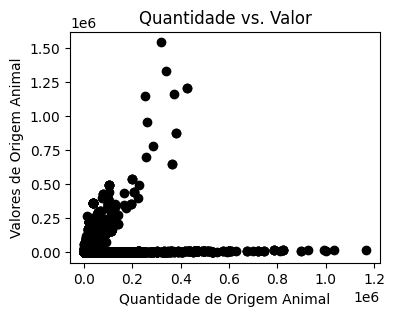

In [80]:
# Existe alguma relação entre Quantidade de produtos com o valor ? (Produtos de Origem animal)
plt.figure(figsize=(4,3))
plt.scatter(df['quantidade_OA'], df['valor_OA'], color='black')
plt.xlabel('Quantidade de Origem Animal')
plt.ylabel('Valores de Origem Animal')
plt.title('Quantidade vs. Valor')
plt.show()


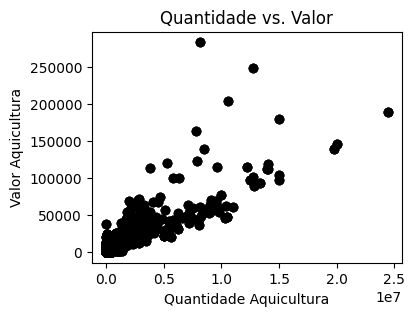

In [81]:
# Existe alguma relação entre quantidade de produtos e o valor ? (Aquicultura)
plt.figure(figsize=(4,3))
plt.scatter(df['quantidade_AC'], df['valor_AC'], color='black')
plt.xlabel('Quantidade Aquicultura')
plt.ylabel('Valor Aquicultura')
plt.title('Quantidade vs. Valor')
plt.show()

#### **Gráficos de Boxsplot**



In [82]:
# Boxplot do valor por unidade de Origem de Animal
uniao_oficial

# Criando o boxplot para a coluna 'vp_unidade_OA'
fig = px.box(uniao_oficial, y="vp_unidade_OA", title="Boxplot do valor por unidade de Origem de Animal")
fig.show()

In [83]:
# Boxplot do valor de Origem de Animal por mil unidades.
uniao_oficial

# Criando o boxplot para a coluna 'valor_OA'
fig = px.box(uniao_oficial, y="valor_OA", title="Boxplot do valor de Origem de Animal por mil nunidades.")
fig.show()

In [84]:
# Boxplot do valor por unidade de Aquicultura
uniao_oficial

# Criando o boxplot para a coluna 'vp_unidade_AC'
fig = px.box(uniao_oficial, y="vp_unidade_AC", title="Boxplot do valor por unidade de Aquicultura")
fig.show()

In [90]:
# Boxplot do valor de Aquicultura por mil nunidades.


uniao_oficial

# Criando o boxplot para a coluna 'valor_AC'
fig = px.box(uniao_oficial, y="valor_AC", title="Boxplot do valor de Aquicultura por mil nunidades.")
fig.show()

#### **Gráficos de Histograma**

In [85]:
import plotly.express as px


# Histograma
uniao_oficial


# df  =  px . dados . dicas ()

fig  =  px . histogram ( uniao_oficial ,  x = "ano" )
fig . show ()

#### **Grafico de Setores**

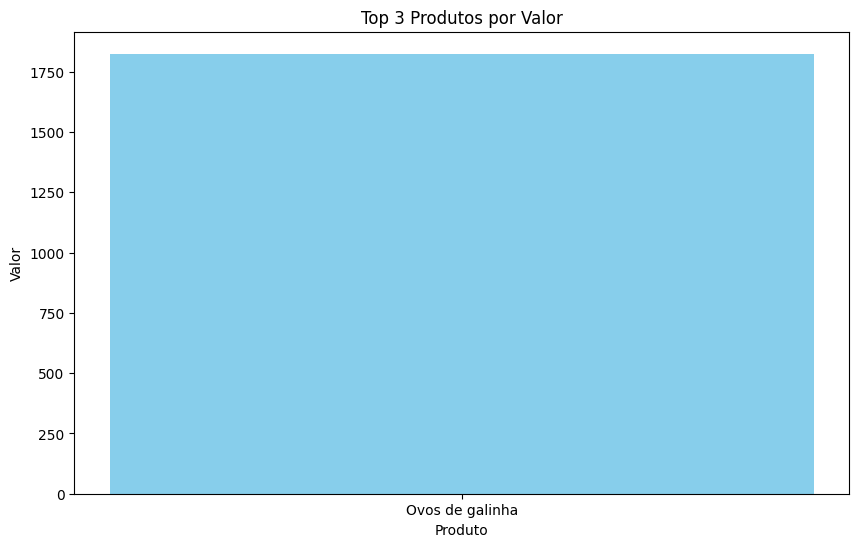

In [86]:
uniao_oficial_sorted = uniao_oficial.sort_values(by='produto_OA', ascending=False)

# Selecionar os top 5 itens
top_5 = uniao_oficial_sorted.head(3)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5['produto_OA'], top_5['quantidade_OA'], color='skyblue')
plt.xlabel('Produto')
plt.ylabel('Valor')
plt.title('Top 3 Produtos por Valor')
plt.show()

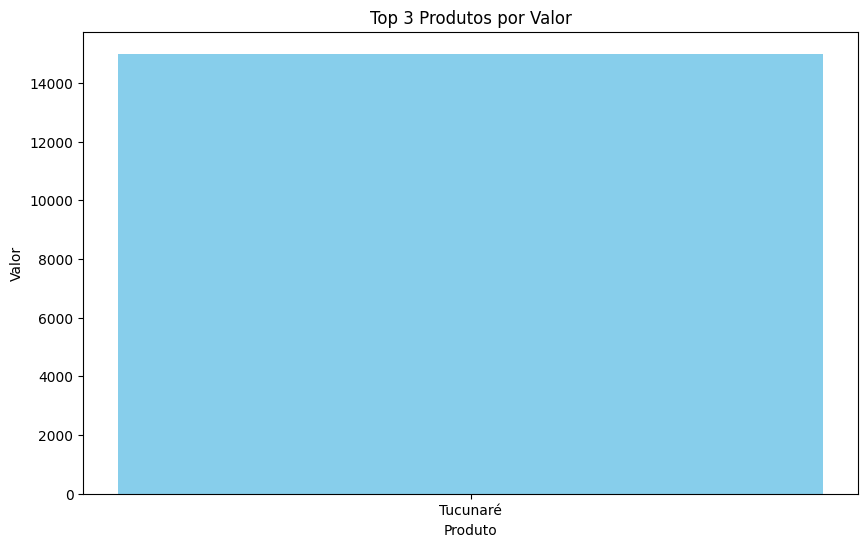

In [87]:
uniao_oficial_sorted = uniao_oficial.sort_values(by='produto_AC', ascending=False)

# Selecionar os top 5 itens
top_5 = uniao_oficial_sorted.head(5)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5['produto_AC'], top_5['quantidade_AC'], color='skyblue')
plt.xlabel('Produto')
plt.ylabel('Valor')
plt.title('Top 3 Produtos por Valor')
plt.show()

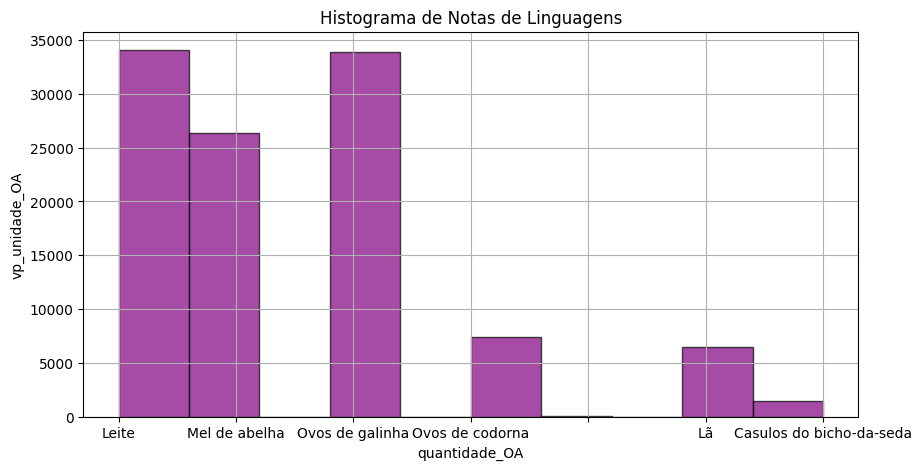

In [88]:
# histograma de Linguagens
plt.figure(figsize=(10, 5))
plt.hist(uniao_oficial['produto_OA'], color='purple', edgecolor='black', alpha=0.7)
plt.title('Histograma de Notas de Linguagens')
plt.xlabel('quantidade_OA')
plt.ylabel('vp_unidade_OA')
plt.grid(True)
plt.show()